# **Project 1 : Data Visualization 491**
Ben Heinze, Elizabeth Pauley\
16 February 2024

## Database Information
* [PhD Dataset Information](https://vincentarelbundock.github.io/Rdatasets/doc/AER/PhDPublications.html)
* [Diamond Dataset Information](https://ggplot2.tidyverse.org/reference/diamonds.html)

## Helpful Links for personal use
* [Pandas Frame Documentation](https://pandas.pydata.org/docs/reference/frame.html)
* [Markdown Format Cheatsheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)

### Setup
Before we create any graphs, it's necessary to import our two data sets **phDPublications.csv** and **diamonsd.csv** into our notebook:

In [116]:
import pandas as pd  
import numpy as np
import sklearn
import seaborn as sns
from matplotlib import pyplot as plt 
phdPub = pd.read_csv("phDPublications.csv")
diamonds = pd.read_csv("diamonds.csv")

## **1. PhD Publication Data Set**
The *PhD Publication* data set will be the first one analyzed; We will look to answer three interesting questions by visualizing them with three different bar plots:

**1. Simple bar plot:** The number of articles published by a student compared to how many kids they have. \
**2. Grouped bar plot:** Illustrate the number of single men, single women, married men and married women and their individual correlation with how many articles their mentor has published. \
**3. Stacked bar plot:** Compare the prestige against men, married men, woman, and married woman.

Text(0, 0.5, 'Number of Articles Published')

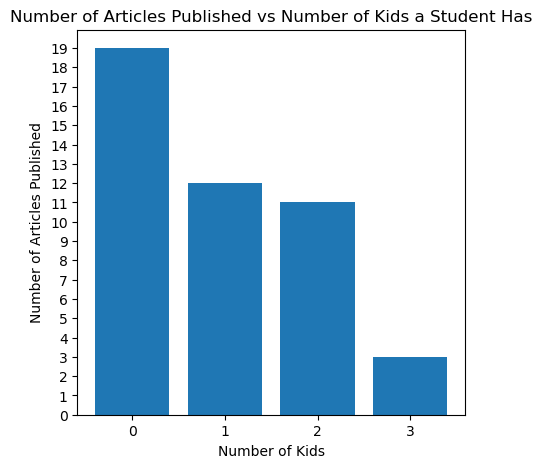

In [117]:
#1. Simple bar plot: The number of articles published by a student compared to how many kids they have
fig = plt.figure(figsize = (5,5))
ax = plt.axes()
ax.bar(phdPub['kids'], phdPub['articles'])
plt.xticks(np.arange(0,4,step=1))
plt.yticks(np.arange(0,20,step=1))
ax.set_title('Number of Articles Published vs Number of Kids a Student Has')
ax.set_xlabel("Number of Kids")
ax.set_ylabel("Number of Articles Published")

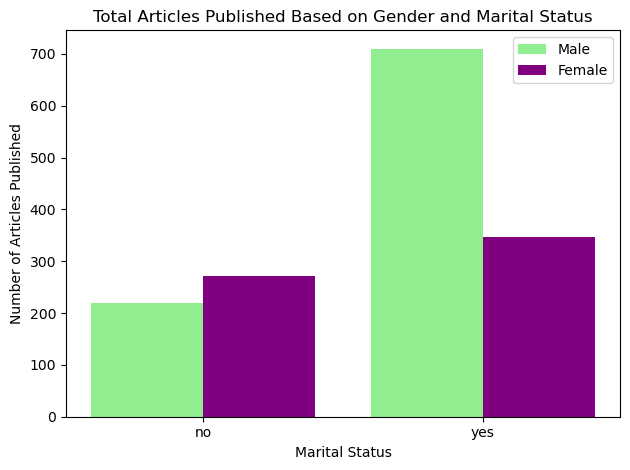

In [118]:
#2. Grouped bar plot: Illustrate the number of single men, single women, married men and married women and their individual correlation with how many articles their mentor has published.

# group by married and gender categories
# sum the values in the 'articles' column
# reset_index() reformats the dataframe to make it easier to access columns
# and perform future computations
groupedBarData = phdPub.groupby(['married', 'gender'])['articles'].sum().reset_index()
groupedBarData

male = groupedBarData[groupedBarData['gender'] =='male']
female = groupedBarData[groupedBarData['gender'] =='female']

x = np.arange(2)  # label locations
width = 0.40  # width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, male['articles'], width, label='Male', color='lightgreen')
rects2 = ax.bar(x + width/2, female['articles'], width, label='Female', color='purple')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Articles Published')
ax.set_xlabel('Marital Status')
ax.set_title('Total Articles Published Based on Gender and Marital Status')
ax.set_xticks(x, male['married'])
ax.legend()

fig.tight_layout()

plt.show()

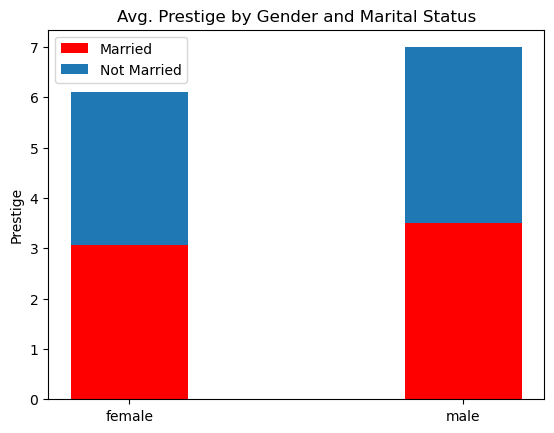

In [119]:
#3. Stacked bar plot: Compare the prestige against men, married men, women, and married women.

# group by married and gender categories
# calculate the average prestige value for each category
# reset_index() reformats the dataframe to make it easier to access columns
# and perform future computations
stackedBarData = phdPub.groupby(['married', 'gender'])['prestige'].mean().reset_index()
stackedBarData

married = stackedBarData[stackedBarData['married'] =='no']
notMarried = stackedBarData[stackedBarData['married'] =='yes']

width = 0.35      

fig, ax = plt.subplots()

ax.bar(married['gender'], married['prestige'], width, label='Married', color='red')
ax.bar(married['gender'], married['prestige'], width, married['prestige'],
       label='Not Married')

ax.set_ylabel('Prestige')
ax.set_title('Avg. Prestige by Gender and Marital Status')
ax.legend()

plt.show()

## Alternatives

In [120]:
#1. Dot Plot: The number of articles published by a student compared to how many kids they have
#x axis: number of kids
#y axis: number of articles published
#color: blue/pink for respective gender

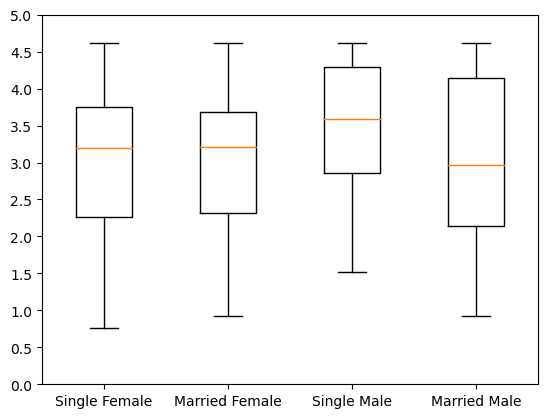

In [121]:
#2. Box Plot: Illustrate the number of single men, single women, married men and married women and their individual correlation with how many articles their mentor has published.
'''
groupby sorts every combination of genders and marital status and divides them
into different dataframes. It returns an iterable of every df it created. 

Below, we created every combo of gender (m/f) and marital status (yes/no).
'''
groupData = phdPub.groupby(["gender", "married"])

labels=[]
plotData=[]
for (gender, married), group in groupData: 
    label = ("Married" if married == 'yes' else "Single") #label is marital status
    label += (" Female" if gender == 'female' else " Male") #appends gender
    labels.append(label)
    plotData.append(group["prestige"])
plt.boxplot(plotData, labels=labels)
plt.yticks(np.arange(0,5.5,step=0.5))

plt.show()


In [122]:
#3. Strip Chart: Compare the prestige against men, married men, woman, and married woman.


## **2. Diamond Data Set**
Next, we will focus our attention on the *Diamond* data set. Questions to answer about the diamond dataset include:
1. Comparing the carat of the price of the diamond (histogram)
2. Color (one hot encoded) compared to clarity (kernal estimation)
3. QUESTION3 (PLOTTYPE)

In [123]:
#continue diamond plots here
print(diamonds)


       Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
0               1   0.23      Ideal     E     SI2   61.5   55.0    326  3.95   
1               2   0.21    Premium     E     SI1   59.8   61.0    326  3.89   
2               3   0.23       Good     E     VS1   56.9   65.0    327  4.05   
3               4   0.29    Premium     I     VS2   62.4   58.0    334  4.20   
4               5   0.31       Good     J     SI2   63.3   58.0    335  4.34   
...           ...    ...        ...   ...     ...    ...    ...    ...   ...   
53935       53936   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75   
53936       53937   0.72       Good     D     SI1   63.1   55.0   2757  5.69   
53937       53938   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66   
53938       53939   0.86    Premium     H     SI2   61.0   58.0   2757  6.15   
53939       53940   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83   

          y     z  
0      3.98  2.43  

In [ ]:
# Question 1 Comparing the carat of the price of the diamond (histogram)

In [ ]:
# Question 2 Color (one hot encoded) compared to clarity (kernal estimation)

## **3. Recent news-source plots**
Next, we will evaluate amount and distribution data plots and their effectiveness to display data for the given question. It is important to stay mindful of the Trifecta Checkup framework to keep track of the question and goal the graph is attempting to visualize.
1. Amount dataplot (link here)
2. Distribution dataplot (link here)
